In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

df = sns.load_dataset("titanic")

In [2]:
df = df.reset_index(drop=True)

In [3]:
cols = ["pclass",	"sex",	"age",	"sibsp",	"parch",	"fare",	"embarked"]
x = df[cols]

- Survived : 0 = 사망, 1 = 생존
- Pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석
- Sex : male = 남성, female = 여성
- Age : 나이
- SibSp : 타이타닉 호에 동승한 자매 / 배우자의 수
- Parch : 타이타닉 호에 동승한 부모 / 자식의 수
- Ticket : 티켓 번호
- Fare : 승객 요금
- Cabin : 방 호수
- Embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   sex       891 non-null    object 
 2   age       714 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


# 결측치(Missing Value)


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   sex       891 non-null    object 
 2   age       714 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


## 통계치를 이용하여 결측값 채우기


### Pandas 메소드를 이용한 방법


In [4]:
age_median = x["age"].median()
x["age"].fillna(age_median, inplace=True)

C:\Users\KOJUNSUNG\AppData\Local\Temp\ipykernel_22368\3605151700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["age"].fillna(age_median, inplace=True)


In [5]:
x["embarked"].fillna( method='ffill', inplace=True)

C:\Users\KOJUNSUNG\AppData\Local\Temp\ipykernel_22368\3123882648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["embarked"].fillna( method='ffill', inplace=True)


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   sex       891 non-null    object 
 2   age       891 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


# Encoding

- 범주형 인코딩

![image.png](attachment:image.png)

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

items = ['사과', '딸기', '포도', '배', '망고', '망고', '바나나', '바나나']

In [ ]:

#LabelEncoder를 객체로 생성한 후 fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder() # 1. 객체 생성
encoder.fit(items) # 객체 fit : encoding 대상에 대해 fit
labels = encoder.transform(items)
print('Label tranform : ', labels)
print('Encoding Class : ', encoder.classes_)
print('Inverse Transform : ', encoder.inverse_transform([0, 1, 4, 5, 3, 3, 2, 2]))

Label tranform :  [4 0 5 3 1 1 2 2]
Encoding Class :  ['딸기' '망고' '바나나' '배' '사과' '포도']
Inverse Transform :  ['딸기' '망고' '사과' '포도' '배' '배' '바나나' '바나나']


In [ ]:
# fit + transform = fit_transform
encoder = LabelEncoder()
encoder.fit_transform(items)

In [ ]:

#OneHotEncoder 사용
#먼저 숫자값으로 변환을 위해 LabelEncoder로 변환
print('Label encoder')
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print(labels)

Label encoder
[4 0 5 3 1 1 2 2]


In [ ]:
#2차원 데이터로 변환
labels = labels.reshape(-1,1)
print(labels)


[[4]
 [0]
 [5]
 [3]
 [1]
 [1]
 [2]
 [2]]


In [ ]:
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원핫 인코딩 데이터')
print(oh_labels.toarray())
print('원핫 인코딩 데이터 차원')
print(oh_labels.shape)

원핫 인코딩 데이터
[[0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원핫 인코딩 데이터 차원
(8, 6)


- label encoding
    - 범주형 변수의 N개 종류의 값들을 0 에서 n-1 값으로 숫자를 부여하는 인코딩이다.

In [7]:
# embarked 에 label encoding 을 적용해 보자 x["embarked"] 에 적용
enc = LabelEncoder()
x["embarked"] = enc.fit_transform(x["embarked"])

C:\Users\KOJUNSUNG\AppData\Local\Temp\ipykernel_22368\4246121687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["embarked"] = enc.fit_transform(x["embarked"])


In [8]:
x.embarked.head()

0    2
1    0
2    2
3    2
4    2
Name: embarked, dtype: int32

In [11]:
# sex에 one hot encoding 을 적용해 보자.  x[["male","female"]] 에 적용
# del x["sex"]
# male female
#  0     1
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
ohe = OneHotEncoder(sparse=False)
# ohe.fit(x[['sex']])
ohe_encoded = ohe.fit_transform(x[['sex']]) #sex column(=feature) 에 대하여 원핫인코딩을 적용. 
ohe_encoded_df = pd.DataFrame(ohe_encoded , columns=ohe.categories_[0]) #categories 에 적용전 column 정보가 남아있음
x = pd.concat([x, ohe_encoded_df], axis =1)

In [12]:
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,female,male
0,3,male,22.0,1,0,7.2500,2,0.0,1.0
1,1,female,38.0,1,0,71.2833,0,1.0,0.0
2,3,female,26.0,0,0,7.9250,2,1.0,0.0
3,1,female,35.0,1,0,53.1000,2,1.0,0.0
4,3,male,35.0,0,0,8.0500,2,0.0,1.0


In [15]:
ohe.categories_

[array(['female', 'male'], dtype=object)]

In [10]:
ohe_encoded

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [21]:
del x["sex"]
x.head()

,pclass,age,sibsp,parch,fare,embarked,female,male
0,3,22.0,1,0,7.2500,2,0.0,1.0
1,1,38.0,1,0,71.2833,0,1.0,0.0
2,3,26.0,0,0,7.9250,2,1.0,0.0
3,1,35.0,1,0,53.1000,2,1.0,0.0
4,3,35.0,0,0,8.0500,2,0.0,1.0


- Ordinal encoding
    - 순서형 변수에 매우 적합한 인코딩 방식
    

In [ ]:
# target encoding # 정답값에 비율을 인코딩하는 것 , 정답값을 이용해서 피쳐를 만드는거라고 보면됨 

In [ ]:
x["pclass"]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: int64

In [22]:
ordinal_dict = {
    1 : 0,
    2 : 1,
    3 : 2
}
x["pclass"].map(ordinal_dict)

0      2
1      0
2      2
3      0
4      2
      ..
886    1
887    0
888    2
889    0
890    2
Name: pclass, Length: 891, dtype: int64

In [23]:
x["pclass"] = x["pclass"].map(ordinal_dict)

In [ ]:
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,2,male,22.0,1,0,7.2500,2
1,0,female,38.0,1,0,71.2833,0
2,2,female,26.0,0,0,7.9250,2
3,0,female,35.0,1,0,53.1000,2
4,2,male,35.0,0,0,8.0500,2


- 정답값

In [18]:
target = df["survived"]
target.shape

(891,)

In [ ]:
x.head()

,pclass,age,sibsp,parch,fare,embarked,female,male
0,2,22.0,1,0,7.2500,2,0.0,1.0
1,0,38.0,1,0,71.2833,0,1.0,0.0
2,2,26.0,0,0,7.9250,2,1.0,0.0
3,0,35.0,1,0,53.1000,2,1.0,0.0
4,2,35.0,0,0,8.0500,2,0.0,1.0


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, target)

# Feature Scaling 

In [25]:
from sklearn.linear_model import LogisticRegression

SEED = 1234
model = LogisticRegression(random_state=SEED)
model.fit(x_train,y_train)

c:\Users\KOJUNSUNG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1234)

In [27]:
from sklearn.metrics import roc_auc_score

# roc_auc_score를 사용하기 위해 확률로 결과 출력
pred = model.predict_proba(x_test)[:,1] 

# predict_proba 함수는 각 샘플에 대해 어느 클래스에 속할 확률을 0에서 1 사이의 값으로 돌려준다.

# predict 함수는 새로운 속성들을 넣었을 때 그 클래스에 속하는지 속하지 않는지를 나타내는 1 또는 0으로 구성된 벡터를 반환해준다.
pred

array([0.01003916, 0.04309907, 0.08430641, 0.96700496, 0.18777325,
       0.08480279, 0.11139407, 0.11343871, 0.52173393, 0.70537999,
       0.08425378, 0.96671105, 0.11027228, 0.03963851, 0.08312882,
       0.65969869, 0.95482781, 0.08067648, 0.2547785 , 0.9007755 ,
       0.09042963, 0.17270496, 0.79420329, 0.09984913, 0.15843778,
       0.83548241, 0.11320541, 0.89029131, 0.64085438, 0.06774397,
       0.06486497, 0.50884275, 0.14329279, 0.08430641, 0.80417922,
       0.14329279, 0.54204427, 0.14972456, 0.21089251, 0.40077027,
       0.64387703, 0.23341576, 0.18172235, 0.5548131 , 0.30288058,
       0.65734773, 0.13430846, 0.77685744, 0.67173053, 0.05555914,
       0.56534626, 0.08430641, 0.61870363, 0.66151635, 0.97614317,
       0.67013749, 0.10590615, 0.04677768, 0.60327789, 0.63453585,
       0.39481513, 0.83879504, 0.1765849 , 0.68972712, 0.92975546,
       0.18624011, 0.03156982, 0.12192439, 0.63288962, 0.09123887,
       0.81195042, 0.08764097, 0.38713811, 0.97712796, 0.10589

In [28]:
roc_auc_score(y_test,pred)

0.7973474801061008

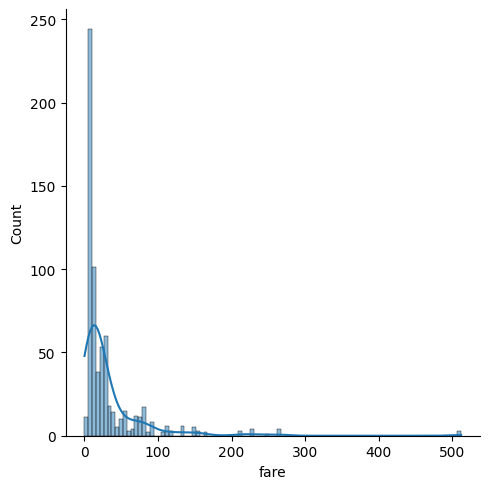

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(x_train["fare"],kde=True)
plt.show()

## Standardization (표준화)
- 평균과 표준편차를 이용하여 모든 피쳐의 평균을 0, 분산을 1인 값으로 변환
- 이상치가 있다면 평균과 표준편차에 영향을 미친다.


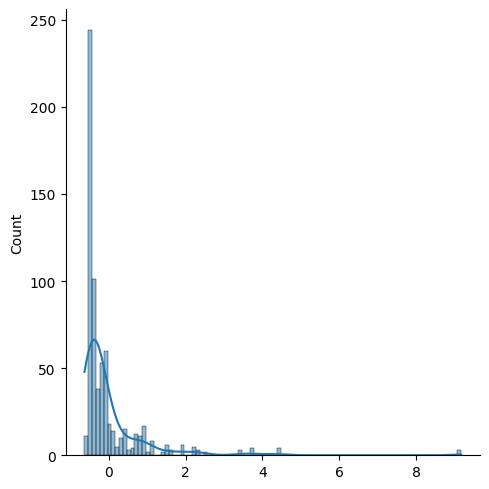

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_sc = scaler.fit_transform(x_train) # numpy 형태로 반환
sns.displot(x_train_sc[:,4],kde=True) # fare가 4번째 인덱스에 있음
plt.show()

## Min-Max Scaling
- Features의 최소값, 최대값을 이용해서 0을 정규화한다.ㅇ

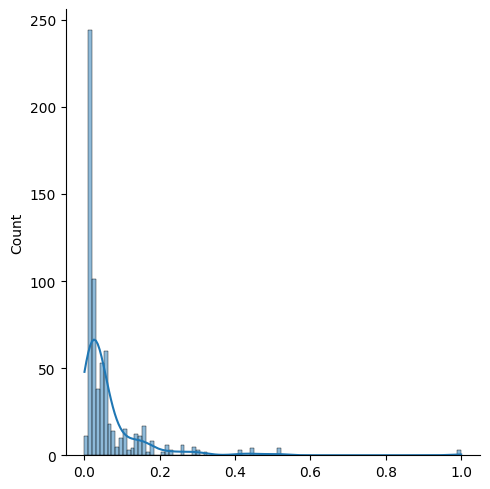

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_sc = scaler.fit_transform(x_train)

sns.displot(x_train_sc[:,4],kde=True)
plt.show()

## Power Transformation 
- 거듭제곱 변환을 적용하여서 데이터를 정규분포와 유사하게 변환


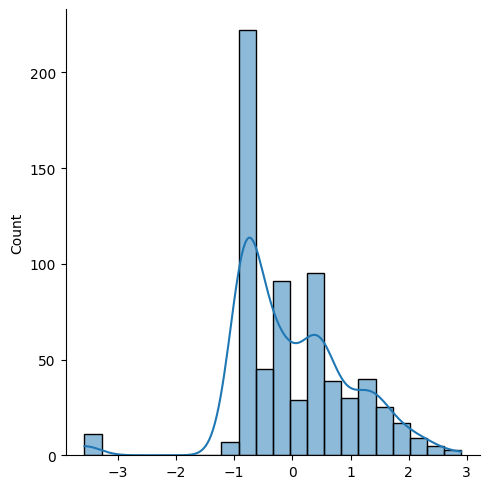

In [ ]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
x_train_sc = scaler.fit_transform(x_train)
sns.displot(x_train_sc[:,4],kde=True) #KDE는 카우스 커널을 사용해서 그래프를 연속적으로 부드럽게 나타냅니다. 즉 부드러운 곡선 그래프.
plt.show()

## RoboutsScaler 
- 평균과 분산 대신 중간값과 사분위수값을 사용
- 이상치 영향을 최소화 

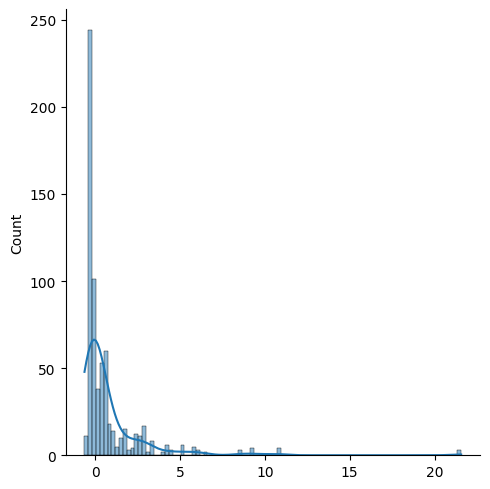

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train_sc = scaler.fit_transform(x_train)
sns.displot(x_train_sc[:,4],kde=True)
plt.show()

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)

model = LogisticRegression(random_state=SEED)
model.fit(scaler.transform(x_train),y_train)

pred = model.predict_proba(scaler.transform(x_test))[:,1]
roc_auc_score(y_test,pred)

0.8687289562289562

- minmaxscaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)

model = LogisticRegression(random_state=SEED)
model.fit(scaler.transform(x_train),y_train)

pred = model.predict_proba(scaler.transform(x_test))[:,1]
roc_auc_score(y_test,pred)

0.8661195286195286

In [ ]:
scaler = PowerTransformer()
scaler.fit(x_train)

model = LogisticRegression(random_state=SEED)
model.fit(scaler.transform(x_train),y_train)

pred = model.predict_proba(scaler.transform(x_test))[:,1]
roc_auc_score(y_test,pred)

0.8745370370370371

In [ ]:
scaler = RobustScaler()
scaler.fit(x_train)

model = LogisticRegression(random_state=SEED)
model.fit(scaler.transform(x_train),y_train)

pred = model.predict_proba(scaler.transform(x_test))[:,1]
roc_auc_score(y_test,pred)

0.8691498316498316